In [103]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datetime
import re

## Data Preparation

In [104]:
twitter_df_1 = pd.read_csv("twitter_df_1.csv")
twitter_df_2 = pd.read_csv("twitter_df_2.csv")

In [105]:
twitter_df_1.head()

,row,id,date,query,handle,tweet
0,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
1,224,1467871661,Mon Apr 06 22:35:41 PDT 2009,NO_QUERY,ciairuhh,"I miss you twitter. My phone broke, now I'm us..."
2,231,1467872181,Mon Apr 06 22:35:50 PDT 2009,NO_QUERY,admdrw,@charlietm I know right. I dunno what is going...
3,562,1467951568,Mon Apr 06 22:57:59 PDT 2009,NO_QUERY,spcake,@chordsy - why am I the last to find out about...
4,611,1467966271,Mon Apr 06 23:02:00 PDT 2009,NO_QUERY,leelaaa,finding it really hard to use twitter


In [106]:
twitter_df_1.tail()

,row,id,date,query,handle,tweet
11600,815947,1551272624,Sat Apr 18 08:36:43 PDT 2009,NO_QUERY,TeresaBrazen,"(shade, not shad) the permanence of typos in..."
11601,815951,1551272818,Sat Apr 18 08:36:46 PDT 2009,NO_QUERY,adiktusnine,@kaymania hey kay welcome back to twittering?...
11602,815974,1551273519,Sat Apr 18 08:36:52 PDT 2009,NO_QUERY,chaucolate,Wanted to see wassup with the twitter craze
11603,816017,1551302841,Sat Apr 18 08:41:42 PDT 2009,NO_QUERY,mnrmg,I had a dream that my twitter picture changed ...
11604,816168,1551335161,Sat Apr 18 08:47:01 PDT 2009,NO_QUERY,martinaarseth,I'm new on twitter


In [107]:
twitter_df_2.head()

,row,id,date,query,handle,tweet
0,816217,1551363926,Sat Apr 18 08:51:43 PDT 2009,NO_QUERY,kelliekano,@Dragoncade I see you're delivering your daily...
1,816220,1551364021,Sat Apr 18 08:51:44 PDT 2009,NO_QUERY,reesypants,@reedoh Hello lovely! Wow it's great to hear f...
2,816226,1551364223,Sat Apr 18 08:51:46 PDT 2009,NO_QUERY,IsJonas,A big mean asshole messed up my twitter.. so t...
3,816284,1551393580,Sat Apr 18 08:56:33 PDT 2009,NO_QUERY,KristinNewman,twitter...jitter...all the same
4,816296,1551393991,Sat Apr 18 08:56:37 PDT 2009,NO_QUERY,mikemonty,just updated his twitter profile's design Che...


In [108]:
twitter_df_2.tail()

,row,id,date,query,handle,tweet
15662,1599740,2193526868,Tue Jun 16 08:34:42 PDT 2009,NO_QUERY,ctycty,bye twitter . restin' time ! nite
15663,1599801,2193529738,Tue Jun 16 08:34:56 PDT 2009,NO_QUERY,JanetEatWorld1,Haha yess making maria get a twitter
15664,1599818,2193551216,Tue Jun 16 08:36:40 PDT 2009,NO_QUERY,ODonnell1888,twitter virginity broken
15665,1599860,2193552958,Tue Jun 16 08:36:49 PDT 2009,NO_QUERY,angelxwarrior,"@kazzc22 no probs kazz hun,i think theres a ne..."
15666,1599905,2193575079,Tue Jun 16 08:38:38 PDT 2009,NO_QUERY,CaraIsaac,@SarahG8s lol i wasnt on about the burns lol i...


In [109]:
twitter_df = pd.concat([twitter_df_1, twitter_df_1])

In [110]:
twitter_df.head()

,row,id,date,query,handle,tweet
0,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
1,224,1467871661,Mon Apr 06 22:35:41 PDT 2009,NO_QUERY,ciairuhh,"I miss you twitter. My phone broke, now I'm us..."
2,231,1467872181,Mon Apr 06 22:35:50 PDT 2009,NO_QUERY,admdrw,@charlietm I know right. I dunno what is going...
3,562,1467951568,Mon Apr 06 22:57:59 PDT 2009,NO_QUERY,spcake,@chordsy - why am I the last to find out about...
4,611,1467966271,Mon Apr 06 23:02:00 PDT 2009,NO_QUERY,leelaaa,finding it really hard to use twitter


In [111]:
twitter_df.tail()

,row,id,date,query,handle,tweet
11600,815947,1551272624,Sat Apr 18 08:36:43 PDT 2009,NO_QUERY,TeresaBrazen,"(shade, not shad) the permanence of typos in..."
11601,815951,1551272818,Sat Apr 18 08:36:46 PDT 2009,NO_QUERY,adiktusnine,@kaymania hey kay welcome back to twittering?...
11602,815974,1551273519,Sat Apr 18 08:36:52 PDT 2009,NO_QUERY,chaucolate,Wanted to see wassup with the twitter craze
11603,816017,1551302841,Sat Apr 18 08:41:42 PDT 2009,NO_QUERY,mnrmg,I had a dream that my twitter picture changed ...
11604,816168,1551335161,Sat Apr 18 08:47:01 PDT 2009,NO_QUERY,martinaarseth,I'm new on twitter


In [112]:
print(twitter_df.shape)

(23210, 6)


In [113]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23210 entries, 0 to 11604
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   row     23210 non-null  int64 
 1   id      23210 non-null  int64 
 2   date    23210 non-null  object
 3   query   23210 non-null  object
 4   handle  23210 non-null  object
 5   tweet   23210 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [114]:
twitter_df = twitter_df.reset_index()
twitter_df.head()

,index,row,id,date,query,handle,tweet
0,0,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
1,1,224,1467871661,Mon Apr 06 22:35:41 PDT 2009,NO_QUERY,ciairuhh,"I miss you twitter. My phone broke, now I'm us..."
2,2,231,1467872181,Mon Apr 06 22:35:50 PDT 2009,NO_QUERY,admdrw,@charlietm I know right. I dunno what is going...
3,3,562,1467951568,Mon Apr 06 22:57:59 PDT 2009,NO_QUERY,spcake,@chordsy - why am I the last to find out about...
4,4,611,1467966271,Mon Apr 06 23:02:00 PDT 2009,NO_QUERY,leelaaa,finding it really hard to use twitter


In [115]:
twitter_df = twitter_df[['date','tweet']]
twitter_df.head()

,date,tweet
0,Mon Apr 06 22:20:09 PDT 2009,@twittera que me muera ?
1,Mon Apr 06 22:35:41 PDT 2009,"I miss you twitter. My phone broke, now I'm us..."
2,Mon Apr 06 22:35:50 PDT 2009,@charlietm I know right. I dunno what is going...
3,Mon Apr 06 22:57:59 PDT 2009,@chordsy - why am I the last to find out about...
4,Mon Apr 06 23:02:00 PDT 2009,finding it really hard to use twitter


In [116]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'])
twitter_df.head()

,date,tweet
0,2009-04-06 22:20:09,@twittera que me muera ?
1,2009-04-06 22:35:41,"I miss you twitter. My phone broke, now I'm us..."
2,2009-04-06 22:35:50,@charlietm I know right. I dunno what is going...
3,2009-04-06 22:57:59,@chordsy - why am I the last to find out about...
4,2009-04-06 23:02:00,finding it really hard to use twitter


In [117]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23210 entries, 0 to 23209
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    23210 non-null  datetime64[ns]
 1   tweet   23210 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 362.8+ KB


In [278]:
# functions to apply to tweets

def rm_http(tweet):
    tweet = re.sub(r"https\S+","",tweet)
    return tweet

def rm_spec_chars(tweet):
    pattern = r'[^a-zA-Z0-9\s]'
    tweet = re.sub(pattern,"",tweet)
    return tweet

def rm_whitespace(tweet):
    tweet = tweet.strip(" ")
    return " ".join(tweet.split())

def polarity_score(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return - 1

def polarity_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"
    
def subjectivity_word(x):
    if (x < 0.6 and x >0.4):
        return "subjective"
    else:
        return "objective"
    
def vader_score(x):
    if x > 0.05:
        return 1
    elif x < -0.05:
        return -1
    else:
        return 0

def vader_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"

In [119]:
twitter_df['tweet'] = twitter_df['tweet'].apply(func = rm_http)
twitter_df['tweet'] = twitter_df['tweet'].apply(func = rm_spec_chars)
twitter_df['tweet'] = twitter_df['tweet'].apply(func = rm_whitespace)
twitter_df.head()

,date,tweet
0,2009-04-06 22:20:09,twittera que me muera
1,2009-04-06 22:35:41,I miss you twitter My phone broke now Im using...
2,2009-04-06 22:35:50,charlietm I know right I dunno what is going o...
3,2009-04-06 22:57:59,chordsy why am I the last to find out about th...
4,2009-04-06 23:02:00,finding it really hard to use twitter


In [120]:
twitter_df.tweet[0]

'twittera que me muera'

In [121]:
twitter_df.loc[0][1]

'twittera que me muera'

In [122]:
from textblob import TextBlob

In [123]:
#pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [124]:
import nltk
from nltk.stem import WordNetLemmatizer

In [125]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\benmc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
lemmatizer = WordNetLemmatizer()

In [127]:
twitter_df['lemmatizer'] = twitter_df['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [128]:
twitter_df

,date,tweet,lemmatizer
0,2009-04-06 22:20:09,twittera que me muera,twittera que me muera
1,2009-04-06 22:35:41,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...
2,2009-04-06 22:35:50,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...
3,2009-04-06 22:57:59,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...
4,2009-04-06 23:02:00,finding it really hard to use twitter,finding it really hard to use twitter
...,...,...,...
23205,2009-04-18 08:36:43,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...
23206,2009-04-18 08:36:46,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...
23207,2009-04-18 08:36:52,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze
23208,2009-04-18 08:41:42,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...


### Sentiment Analysis

In [129]:
twitter_df['polarity_scores'] = twitter_df['lemmatizer'].map(lambda text: TextBlob(text).sentiment.polarity)

In [130]:
twitter_df

,date,tweet,lemmatizer,polarity_scores
0,2009-04-06 22:20:09,twittera que me muera,twittera que me muera,0.000000
1,2009-04-06 22:35:41,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000
2,2009-04-06 22:35:50,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714
3,2009-04-06 22:57:59,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000
4,2009-04-06 23:02:00,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667
...,...,...,...,...
23205,2009-04-18 08:36:43,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...,0.000000
23206,2009-04-18 08:36:46,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...,0.533333
23207,2009-04-18 08:36:52,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze,0.000000
23208,2009-04-18 08:41:42,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...,0.000000


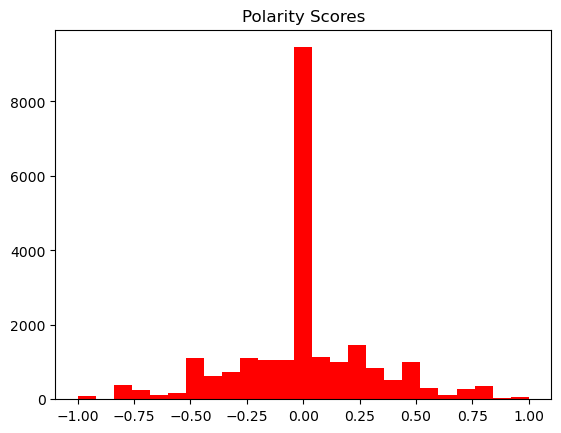

In [131]:
plt.hist(twitter_df['polarity_scores'], bins = 25, color = "red")
plt.title('Polarity Scores')
plt.show()

In [163]:
twitter_df['polarity_scores_int'] = twitter_df['polarity_scores'].apply(func = polarity_score)
twitter_df['polarity_word'] = twitter_df['polarity_scores_int'].apply(func = polarity_word)

In [164]:
twitter_df.head()

,date,tweet,lemmatizer,polarity_scores,subjectivity_scores,vader_scores,polarity_scores_int,polarity_word
0,2009-04-06,twittera que me muera,twittera que me muera,0.000000,0.000000,0.0000,0,neutral
1,2009-04-06,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000,1.000000,-0.8126,-1,negative
2,2009-04-06,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714,0.535714,0.0000,1,positive
3,2009-04-06,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000,0.066667,0.3612,0,neutral
4,2009-04-06,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667,0.541667,-0.1761,-1,negative


In [165]:
import seaborn as sns

<Axes: xlabel='polarity_word', ylabel='count'>

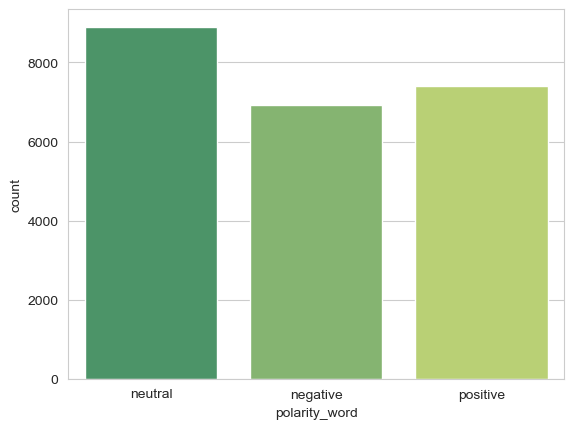

In [166]:
sns.set_style('whitegrid')
sns.countplot(x='polarity_word',data=twitter_df, palette='summer')

In [132]:
twitter_df['subjectivity_scores'] = twitter_df['lemmatizer'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

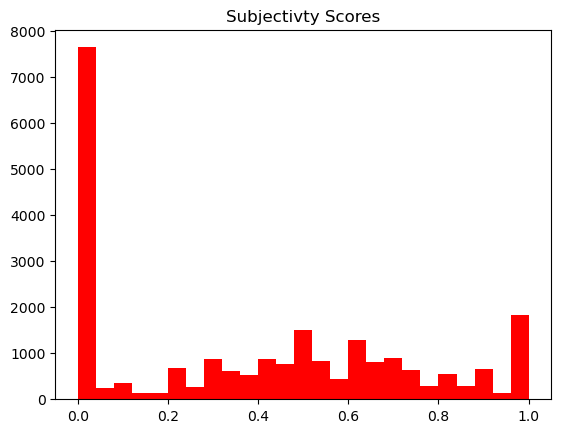

In [133]:
plt.hist(twitter_df['subjectivity_scores'], bins = 25, color = "red")
plt.title('Subjectivty Scores')
plt.show()

In [134]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [135]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [136]:
vader_scores[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [137]:
analyzer = SentimentIntensityAnalyzer()
vader_scores = twitter_df['lemmatizer'].apply(analyzer.polarity_scores)
vader = []
for i in vader_scores:
    vader.append(i['compound'])
twitter_df['vader_scores'] = vader

In [138]:
twitter_df

,date,tweet,lemmatizer,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06 22:20:09,twittera que me muera,twittera que me muera,0.000000,0.000000,0.0000
1,2009-04-06 22:35:41,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000,1.000000,-0.8126
2,2009-04-06 22:35:50,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714,0.535714,0.0000
3,2009-04-06 22:57:59,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000,0.066667,0.3612
4,2009-04-06 23:02:00,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667,0.541667,-0.1761
...,...,...,...,...,...,...
23205,2009-04-18 08:36:43,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...,0.000000,0.000000,-0.0772
23206,2009-04-18 08:36:46,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...,0.533333,0.533333,0.8442
23207,2009-04-18 08:36:52,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze,0.000000,0.000000,-0.1531
23208,2009-04-18 08:41:42,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...,0.000000,0.000000,0.2500


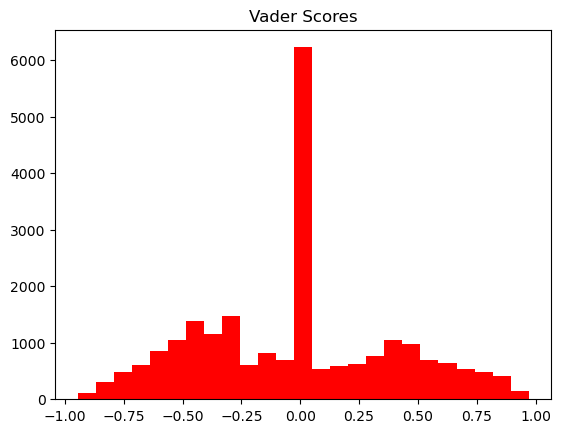

In [139]:
plt.hist(twitter_df['vader_scores'], bins = 25, color = "red")
plt.title('Vader Scores')
plt.show()

In [140]:
from datetime import datetime,date

In [141]:
d = datetime.now()

In [142]:
twitter_df['date'] = [d.date() for d in twitter_df["date"]]
twitter_df

,date,tweet,lemmatizer,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,twittera que me muera,twittera que me muera,0.000000,0.000000,0.0000
1,2009-04-06,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000,1.000000,-0.8126
2,2009-04-06,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714,0.535714,0.0000
3,2009-04-06,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000,0.066667,0.3612
4,2009-04-06,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667,0.541667,-0.1761
...,...,...,...,...,...,...
23205,2009-04-18,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...,0.000000,0.000000,-0.0772
23206,2009-04-18,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...,0.533333,0.533333,0.8442
23207,2009-04-18,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze,0.000000,0.000000,-0.1531
23208,2009-04-18,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...,0.000000,0.000000,0.2500


In [150]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'], format='%m-%d-%Y')

In [167]:
# aggregating the scores for each date in the dataset by computing the average
polarity_df = twitter_df.groupby('date')['polarity_scores'].mean().reset_index()
subjectivity_df = twitter_df.groupby('date')['subjectivity_scores'].mean().reset_index()
vader_df = twitter_df.groupby('date')['vader_scores'].mean().reset_index()

In [168]:
data = {
    'date': polarity_df['date'],
    'polarity_scores': polarity_df['polarity_scores'],
    'subjectivity_scores': subjectivity_df['subjectivity_scores'],
    'vader_scores': vader_df['vader_scores']
}

ts_df = pd.DataFrame(data)
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.120844,0.344059,0.171658
1,2009-04-07,0.112132,0.388600,0.167588
2,2009-04-17,0.144619,0.382783,0.239957
3,2009-04-18,0.065280,0.388870,0.067440
4,2009-04-19,0.010066,0.371499,-0.075920
5,2009-04-20,0.028759,0.354842,0.021357
6,2009-04-21,0.010661,0.339598,-0.083498
7,2009-05-01,-0.002521,0.382570,-0.002876
8,2009-05-02,0.006066,0.413696,-0.033802
9,2009-05-03,0.040717,0.391703,-0.009028


In [169]:
ts_df.set_index('date', inplace=True)

In [170]:
ts_df

,polarity_scores,subjectivity_scores,vader_scores
date,,,
2009-04-06,0.120844,0.344059,0.171658
2009-04-07,0.112132,0.388600,0.167588
2009-04-17,0.144619,0.382783,0.239957
2009-04-18,0.065280,0.388870,0.067440
2009-04-19,0.010066,0.371499,-0.075920
2009-04-20,0.028759,0.354842,0.021357
2009-04-21,0.010661,0.339598,-0.083498
2009-05-01,-0.002521,0.382570,-0.002876
2009-05-02,0.006066,0.413696,-0.033802


In [185]:
ts_df = ts_df.resample('D').ffill().reset_index()

In [186]:
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.120844,0.344059,0.171658
1,2009-04-07,0.112132,0.388600,0.167588
2,2009-04-08,0.112132,0.388600,0.167588
3,2009-04-09,0.112132,0.388600,0.167588
4,2009-04-10,0.112132,0.388600,0.167588
...,...,...,...,...
76,2009-06-21,-0.023605,0.404611,-0.041903
77,2009-06-22,-0.022489,0.380771,-0.057445
78,2009-06-23,-0.004007,0.404711,-0.062917
79,2009-06-24,0.011209,0.325300,0.048257


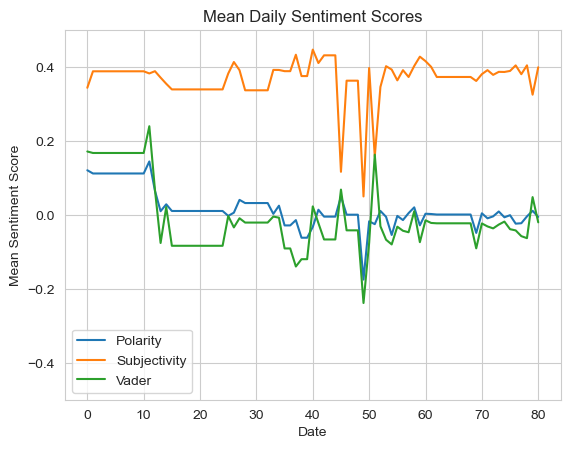

In [187]:
plt.plot(ts_df['polarity_scores'],label='Polarity')
plt.plot(ts_df['subjectivity_scores'],label="Subjectivity")
plt.plot(ts_df['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

### Forecasting

In [176]:
pip install skforecast


  Obtaining dependency information for skforecast from https://files.pythonhosted.org/packages/7f/87/da64dcc2afed93fd2f922fafd65712685861d2d65d9753bfc6e7fbbb95d0/skforecast-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for optuna<3.3,>=2.10.0 from https://files.pythonhosted.org/packages/a0/8c/f72c6bc61b3c71149af95cd91e16149ea5b5aeae99e6d197f80e79a1035a/optuna-3.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/34/47/95d8f99c9f4a57079dfbcff5e023c5d81bde092d1c2354156340a56b3a1a/alembic-1.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for cmaes>=0.9.1 from https://files.pythonhosted.org/packages/f7/46/7d9544d453346f6c0c405916c95fdb653491ea2e9976cabb810ba2fe8cd4/cmaes-0.10.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/78.7 kB ? eta -:--:--
     ---------------------------------------- 78.7/78.7 kB 4.3 MB/s eta 0:00:00
   ------------------

In [178]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
#from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

In [193]:
data_train = ts_df[0:int(len(ts_df)*.8)]

In [196]:
data_test

,date,polarity_scores,subjectivity_scores,vader_scores
64,2009-06-09,0.001078,0.373228,-0.022689
65,2009-06-10,0.001078,0.373228,-0.022689
66,2009-06-11,0.001078,0.373228,-0.022689
67,2009-06-12,0.001078,0.373228,-0.022689
68,2009-06-13,0.001078,0.373228,-0.022689
69,2009-06-14,-0.048690,0.362471,-0.090424
70,2009-06-15,0.004348,0.380900,-0.023044
71,2009-06-16,-0.009170,0.391719,-0.031129
72,2009-06-17,-0.003864,0.378925,-0.036448
73,2009-06-18,0.009300,0.387112,-0.026126


Train dates : 2009-04-06 00:00:00 --- 2009-06-08 00:00:00  (n=64)
Test dates  : 2009-06-09 00:00:00 --- 2009-06-25 00:00:00  (n=17)


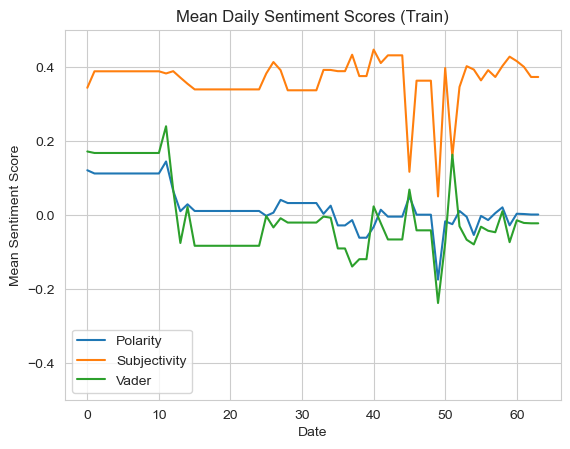

In [199]:
# Split data into train-test

data_train = ts_df[0:int(len(ts_df)*.8)]
data_test  = ts_df[int(len(ts_df)*.8):]

print(f"Train dates : {data_train['date'][0]} --- {data_train['date'][len(data_train) - 1]}  (n={len(data_train)})")
print(f"Test dates  : {data_test['date'][int(len(ts_df)*.8)]} --- {data_test['date'][len(ts_df) - 1]}  (n={len(data_test)})")

plt.plot(data_train['polarity_scores'],label='Polarity')
plt.plot(data_train['subjectivity_scores'],label="Subjectivity")
plt.plot(data_train['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores (Train)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

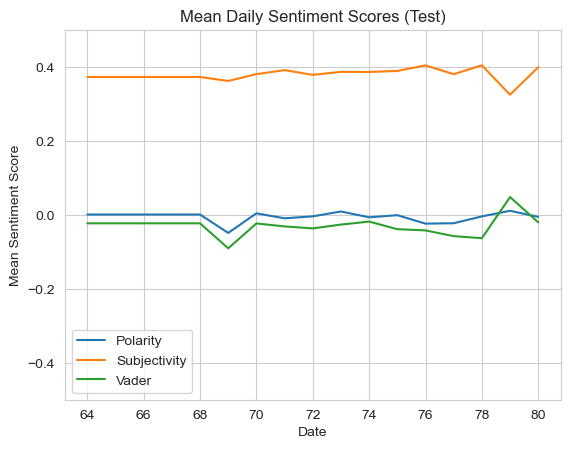

In [200]:
plt.plot(data_test['polarity_scores'],label='Polarity')
plt.plot(data_test['subjectivity_scores'],label="Subjectivity")
plt.plot(data_test['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores (Test)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

### ForecasterAutoreg Polarity

In [234]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 7
                )

forecaster.fit(y=data_train['polarity_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-05 22:08:09 
Last fit date: 2023-11-05 22:08:09 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [235]:
# Predictions
# ==============================================================================
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64    0.002148
65    0.003083
66    0.002241
67   -0.001406
68   -0.002137
Name: pred, dtype: float64

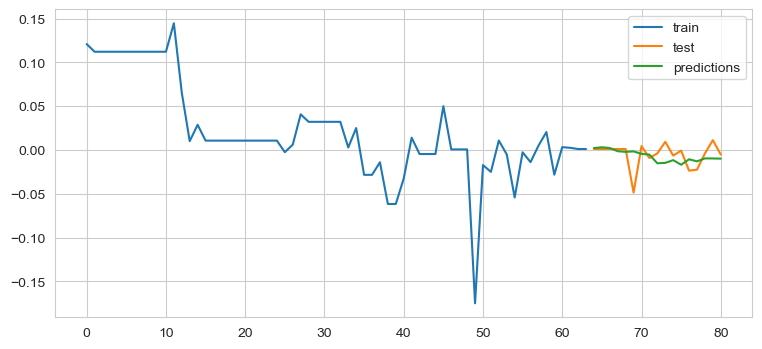

In [236]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['polarity_scores'].plot(ax=ax, label='train')
data_test['polarity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [237]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['polarity_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00023951637126293015


In [238]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['polarity_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 0.001958798567326075



In [239]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.001959,3,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.001963,5,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.001971,5,100
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.001976,3,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.001978,10,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.002009,10,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",0.002736,5,500
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",0.002736,10,500
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.002739,3,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.002761,3,100


In [240]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['polarity_scores'])

In [241]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

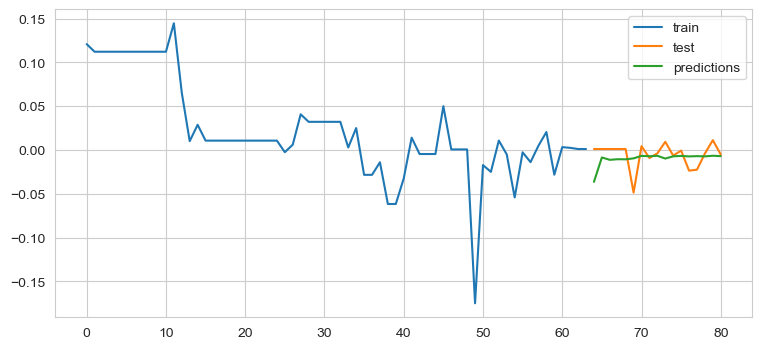

In [242]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['polarity_scores'].plot(ax=ax, label='train')
data_test['polarity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [243]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['polarity_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.0002837770447145876


### ForecasterAutoreg Subjectivity

In [244]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=12356),
                lags = 7
                )

forecaster.fit(y=data_train['subjectivity_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=12356) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 12356, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-05 22:08:51 
Last fit date: 2023-11-05 22:08:51 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [245]:
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64    0.359054
65    0.360604
66    0.336422
67    0.354619
68    0.356256
Name: pred, dtype: float64

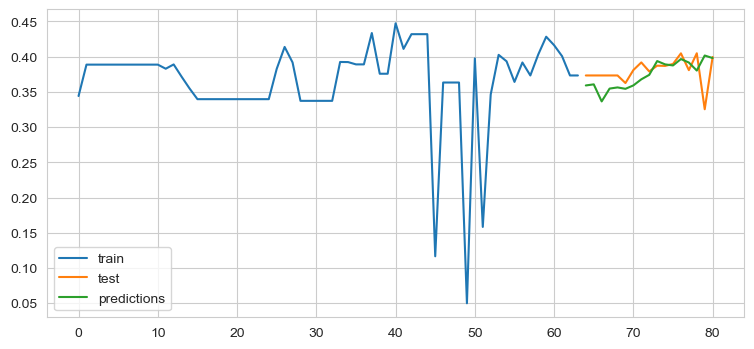

In [246]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['subjectivity_scores'].plot(ax=ax, label='train')
data_test['subjectivity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [247]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['subjectivity_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.0005962811933221857


In [250]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=12356),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['subjectivity_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 0.007884740125715163



In [251]:
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.007885,10,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.007902,10,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.007931,5,100
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.007938,3,100
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.007947,5,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.007980,3,500
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",0.009182,10,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",0.009212,5,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.009286,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.009297,5,100


### Final model

In [252]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=12356)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['subjectivity_scores'])

In [253]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

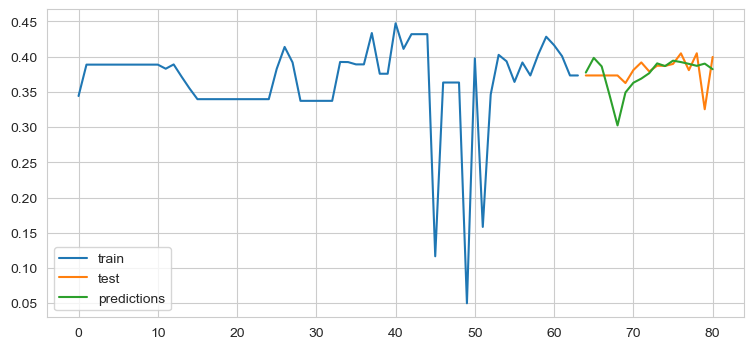

In [254]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['subjectivity_scores'].plot(ax=ax, label='train')
data_test['subjectivity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [255]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['subjectivity_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.0007488659912044558


### ForecasterAutoreg Vader

In [256]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=4567),
                lags = 7
                )

forecaster.fit(y=data_train['vader_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=4567) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 4567, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-05 22:12:02 
Last fit date: 2023-11-05 22:12:03 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [257]:
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64   -0.026487
65   -0.025886
66   -0.024067
67   -0.023141
68   -0.026709
Name: pred, dtype: float64

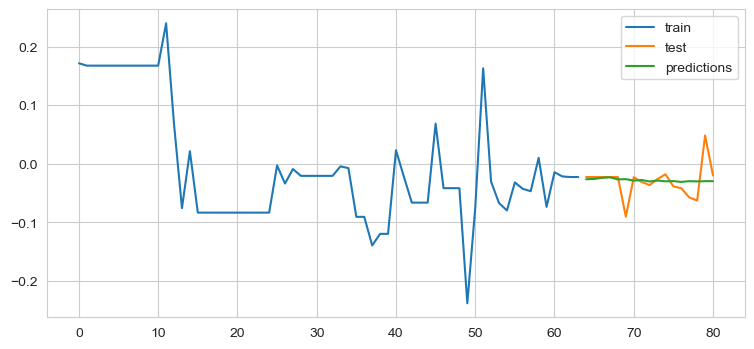

In [258]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['vader_scores'].plot(ax=ax, label='train')
data_test['vader_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [259]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['vader_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.0007413591982464023


In [260]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=4567),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['vader_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 0.004499635443689021



In [261]:
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.004500,5,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.004528,10,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.004584,3,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.004594,5,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.004611,10,100
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.004699,3,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.004814,3,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.004831,5,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.004832,3,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.004848,10,100


In [262]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=5, n_estimators=500, random_state=4567)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['vader_scores'])

In [263]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

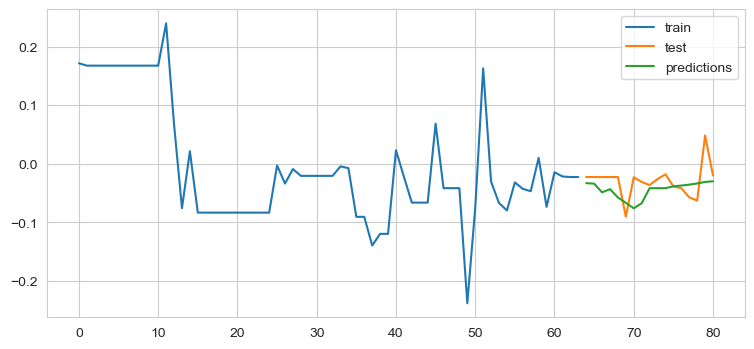

In [264]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['vader_scores'].plot(ax=ax, label='train')
data_test['vader_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [265]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['vader_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.0009320313300114231


### Deep Learning

In [296]:
twitter_df

,date,tweet,lemmatizer,polarity_scores,subjectivity_scores,vader_scores,polarity_scores_int,polarity_word
0,2009-04-06,twittera que me muera,twittera que me muera,0.000000,0.000000,0.0000,0,neutral
1,2009-04-06,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000,1.000000,-0.8126,-1,negative
2,2009-04-06,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714,0.535714,0.0000,1,positive
3,2009-04-06,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000,0.066667,0.3612,0,neutral
4,2009-04-06,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667,0.541667,-0.1761,-1,negative
...,...,...,...,...,...,...,...,...
23205,2009-04-18,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...,0.000000,0.000000,-0.0772,0,neutral
23206,2009-04-18,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...,0.533333,0.533333,0.8442,1,positive
23207,2009-04-18,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze,0.000000,0.000000,-0.1531,0,neutral
23208,2009-04-18,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...,0.000000,0.000000,0.2500,0,neutral


In [297]:
twitter_df['polarity_scores_int'] = twitter_df['polarity_scores'].apply(func = polarity_score)
twitter_df['polarity_word'] = twitter_df['polarity_scores_int'].apply(func = polarity_word)
#ts_df['subjectivity_scores_int'] = ts_df['subjectivity_scores'].apply(func = subjectivity_score)
twitter_df['subjectivity_word'] = twitter_df['subjectivity_scores'].apply(func = subjectivity_word)
twitter_df['vader_scores_int'] = twitter_df['vader_scores'].apply(func = vader_score)
twitter_df['vader_word'] = twitter_df['vader_scores_int'].apply(func = vader_word)

In [298]:
twitter_df

,date,tweet,lemmatizer,polarity_scores,subjectivity_scores,vader_scores,polarity_scores_int,polarity_word,subjectivity_word,vader_scores_int,vader_word
0,2009-04-06,twittera que me muera,twittera que me muera,0.000000,0.000000,0.0000,0,neutral,objective,0,neutral
1,2009-04-06,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000,1.000000,-0.8126,-1,negative,objective,-1,negative
2,2009-04-06,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714,0.535714,0.0000,1,positive,subjective,0,neutral
3,2009-04-06,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000,0.066667,0.3612,0,neutral,objective,1,positive
4,2009-04-06,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667,0.541667,-0.1761,-1,negative,subjective,-1,negative
...,...,...,...,...,...,...,...,...,...,...,...
23205,2009-04-18,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...,0.000000,0.000000,-0.0772,0,neutral,objective,-1,negative
23206,2009-04-18,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...,0.533333,0.533333,0.8442,1,positive,subjective,1,positive
23207,2009-04-18,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze,0.000000,0.000000,-0.1531,0,neutral,objective,-1,negative
23208,2009-04-18,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...,0.000000,0.000000,0.2500,0,neutral,objective,1,positive


<Axes: xlabel='subjectivity_word', ylabel='count'>

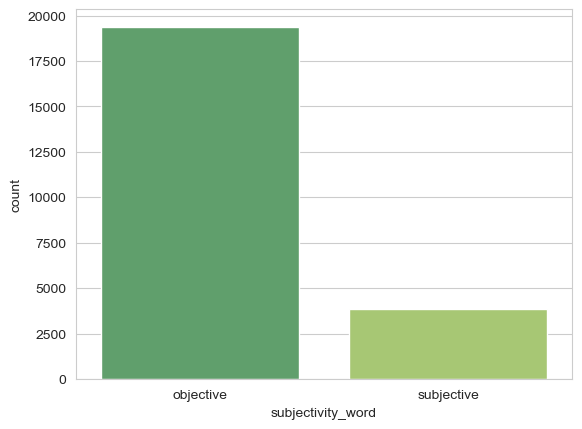

In [299]:
sns.set_style('whitegrid')
sns.countplot(x='subjectivity_word',data=twitter_df, palette='summer')

In [354]:
def get_text_processing(text):
    stpword = stopwords.words('english') 
    no_punctuation = [char for char in text if char not in string.punctuation] 
    no_punctuation = ''.join(no_punctuation) 
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword]) 

In [355]:
twitter_df['test'] = twitter_df['lemmatizer'].apply(get_text_processing)

twitter_df.head()

,date,tweet,lemmatizer,polarity_scores,subjectivity_scores,vader_scores,polarity_scores_int,polarity_word,subjectivity_word,vader_scores_int,vader_word,test
0,2009-04-06,twittera que me muera,twittera que me muera,0.000000,0.000000,0.0000,0,neutral,objective,0,neutral,twittera que muera
1,2009-04-06,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000,1.000000,-0.8126,-1,negative,objective,-1,negative,miss twitter phone broke Im using stupid Nokia...
2,2009-04-06,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714,0.535714,0.0000,1,positive,subjective,0,neutral,charlietm know right dunno going twitter
3,2009-04-06,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000,0.066667,0.3612,0,neutral,objective,1,positive,chordsy last find thing Like youre twitter
4,2009-04-06,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667,0.541667,-0.1761,-1,negative,subjective,-1,negative,finding really hard use twitter


In [356]:
polarity_dummies = pd.get_dummies(twitter_df["polarity_word"])

polarity_df = pd.concat([twitter_df[['date', 'test']], polarity_dummies], axis=1)

polarity_df.head()

,date,test,negative,neutral,positive
0,2009-04-06,twittera que muera,False,True,False
1,2009-04-06,miss twitter phone broke Im using stupid Nokia...,True,False,False
2,2009-04-06,charlietm know right dunno going twitter,False,False,True
3,2009-04-06,chordsy last find thing Like youre twitter,False,True,False
4,2009-04-06,finding really hard use twitter,True,False,False


In [357]:
def dummy_code(x):
    if x == False:
        return 0
    else:
        return 1

In [358]:
polarity_df['negative'] = polarity_df['negative'].apply(func = dummy_code)
polarity_df['neutral'] = polarity_df['neutral'].apply(func = dummy_code)
polarity_df['positive'] = polarity_df['positive'].apply(func = dummy_code)

In [359]:
polarity_df

,date,test,negative,neutral,positive
0,2009-04-06,twittera que muera,0,1,0
1,2009-04-06,miss twitter phone broke Im using stupid Nokia...,1,0,0
2,2009-04-06,charlietm know right dunno going twitter,0,0,1
3,2009-04-06,chordsy last find thing Like youre twitter,0,1,0
4,2009-04-06,finding really hard use twitter,1,0,0
...,...,...,...,...,...
23205,2009-04-18,shade shad permanence typo twitter blessing cu...,0,1,0
23206,2009-04-18,kaymania hey kay welcome back twittering Lol a...,0,0,1
23207,2009-04-18,Wanted see wassup twitter craze,0,1,0
23208,2009-04-18,dream twitter picture changed without knowledg...,0,1,0


In [360]:
from sklearn.model_selection import train_test_split

In [377]:
X = polarity_df["test"].values 
y = polarity_df.drop(["date","test"], axis=1).values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [378]:
X

array(['twittera que muera',
       'miss twitter phone broke Im using stupid Nokia phone Ughhh miss advance phone',
       'charlietm know right dunno going twitter', ...,
       'Wanted see wassup twitter craze',
       'dream twitter picture changed without knowledge follower couldnt recognize amp unfollowed nightmare',
       'Im new twitter'], dtype=object)

In [379]:
import string 
from string import punctuation 
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benmc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [380]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

In [381]:
vect = CountVectorizer() 
X_train = vect.fit_transform(X_train) 
X_test = vect.transform(X_test)

In [382]:
X_train

<16247x16185 sparse matrix of type '<class 'numpy.int64'>'
	with 139118 stored elements in Compressed Sparse Row format>

In [383]:
X_test

<6963x16185 sparse matrix of type '<class 'numpy.int64'>'
	with 57274 stored elements in Compressed Sparse Row format>

In [384]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train) 
X_test = tfidf.transform(X_test)
X_train = X_train.toarray() 
X_test = X_test.toarray()

MemoryError: Unable to allocate 860. MiB for an array with shape (6963, 16185) and data type float64

In [368]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [369]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [329]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.

In [330]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.callbacks import EarlyStopping 

In [336]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [334]:
model = Sequential() 
model.add(Dense(units=16312, activation="relu")) 
model.add(Dropout(0.5)) 
model.add(Dense(units=4000, activation="relu")) 
opt = tf.keras.optimizers.Adam(learning_rate=0.001) 
model.compile(loss="categorical_crossentropy", optimizer=opt, 
metrics=["accuracy"]) 
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=2) 

In [335]:
model.fit( 
 x=X_train, 
 y=y_train, 
 batch_size=256, 
 epochs=100, 
 validation_data=(X_test, y_test), 
 verbose=1, 
 callbacks=early_stop, 
) 

MemoryError: Unable to allocate 1.97 GiB for an array with shape (16247, 16312) and data type float64

In [ ]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1) 
print("Test accuracy:", model_score[1]) 